In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_tools_jet import convert_df as convert_df_jet
from data_tools import convert_df

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

2021-11-22 10:07:49.379867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.1-8d929/x86_64-centos7-gcc8-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.1-f3599/x86_64-centos7-gcc8-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/contrib/tensor_forest:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/python/framework:/cvmfs/sft.cern.ch/lcg/releases/java/8u222-884d8/x86_64-centos7-gcc8-opt/jre/lib/amd64:/cvmfs/sft.

In [2]:
data = {"jet": "/eos/user/p/psimkina/SuperClustering/jets_newds/training/calo_matched/*.proto"}
data_ele = {"ele": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v11/training/calo_matched/*.proto"}
data_gamma = {"gamma": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v11/training/calo_matched/*.proto"}

features = {

"cl_features" : [ "en_cluster","et_cluster",
            "cluster_eta", "cluster_phi", 
            "cluster_ieta","cluster_iphi","cluster_iz",
            "cluster_deta", "cluster_dphi",
             "cluster_den_seed","cluster_det_seed",
            
#             "cl_r9", "cl_sigmaIetaIeta", "cl_sigmaIetaIphi",
#             "cl_sigmaIphiIphi","cl_swissCross","cl_etaWidth","cl_phiWidth"
                 
            "cl_nxtals" ],
    

 "window_features" : [ "max_en_cluster","max_et_cluster","max_deta_cluster","max_dphi_cluster","max_den_cluster","max_det_cluster",
                    "min_en_cluster","min_et_cluster","min_deta_cluster","min_dphi_cluster","min_den_cluster","min_det_cluster",
                    "mean_en_cluster","mean_et_cluster","mean_deta_cluster","mean_dphi_cluster","mean_den_cluster","mean_det_cluster" ],

# Metadata about the window like true energy, true calo position, useful info
 "window_metadata" :  ["en_true_sim","et_true_sim", "en_true_gen", "et_true_gen",
                    "en_true_sim_good", "et_true_sim_good",
                    "nclusters_insc",
                    "nVtx", "rho", "obsPU", "truePU",
                    "sim_true_eta", "sim_true_phi",  
                    "en_mustache_raw", "et_mustache_raw","en_mustache_calib", "et_mustache_calib",
                    "event_tot_simen_PU","wtot_simen_PU", "wtot_simen_sig", "parton_pt", "parton_pdg"]    
}

In [3]:
n = 10000
df_jet = convert_df_jet(data, features, n)
df_ele = convert_df(data_ele, features, n)
df_gamma = convert_df(data_gamma, features, n)
#df_jet.to_csv("gamma_dataset.csv")

True
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


0it [00:00, ?it/s]2021-11-03 09:14:59.754291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-03 09:14:59.755540: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2399910000 Hz
10000it [06:28, 25.74it/s]


Missing branch!  parton_pt


10000it [05:16, 31.59it/s]


Missing branch!  parton_pt


10000it [05:12, 32.04it/s]


In [4]:
df_jet['et_window'] = df_jet['in_sc']*df_jet['et_cluster']
df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']
df_ele['et_window'] = df_ele['in_sc']*df_ele['et_cluster']

In [5]:
et_window_jet = df_jet.groupby(level=0).sum()
et_window_gamma = df_gamma.groupby(level=0).sum()
et_window_ele = df_ele.groupby(level=0).sum()

In [6]:
jet_weights = df_jet['weight'][df_jet['is_seed'] == 1]
gamma_weights = df_gamma['weight'][df_gamma['is_seed'] == 1]

In [7]:
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

In [8]:
et_window_jet['et_window']

0        1.077723
1        1.668734
2        2.289844
3        1.385293
4        2.140124
          ...    
9995     4.293349
9996    23.778271
9997     1.029623
9998    73.272896
9999     1.229902
Name: et_window, Length: 10000, dtype: float32

In [ ]:
#values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step', label='jet no weights', bins=bins, range=(0,100), density=True)
values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step', label='jet weights', bins=100, range=(0,100), weights=jet_weights)
values_gamma, _, _ = plt.hist(et_window_gamma['et_window'], histtype='step', label='gamma', bins=100, range=(0,100), weights=gamma_weights)
values_ele, bins, _ = plt.hist(et_window_ele['et_window'], histtype='step', label='ele', bins=100, range=(0,100))

# bincenters = 0.5*(bins[1:]+bins[:-1])
# menStd     = np.sqrt(values_jets)
# width      = 0.05
# plt.bar(bincenters, values_jets, width=0, color='r', yerr=menStd)


#plt.yscale('log')
plt.legend(loc='lower center')
plt.grid()

In [25]:
import sys
sys.path.append('..')
import tf_data_jet

ds = tf_data_jet.load_balanced_dataset_batch(data, features, 1, jet=True).take(2)
ds = tf_data_jet.training_format(ds, norm=False)

True


In [168]:
df_jet[['et_cluster','in_sc', 'weight']].loc[8]

,et_cluster,in_sc,weight
0,1.120312,1,0.112957
1,0.764151,1,0.112957
2,0.548539,0,0.112957
3,0.503642,1,0.112957
4,0.501671,0,0.112957
5,0.459555,0,0.112957
6,0.299663,0,0.112957
7,0.234317,0,0.112957


In [169]:
1.120312+0.764151+0.503642

2.388105

In [ ]:
# df_jet['et_window'] = df_jet['et_cluster']*df_jet['in_sc']

In [29]:
et_window_jet = df_jet.groupby(level=0).sum()

In [32]:
et_window_jet['et_window']

0     34.881258
1    261.751343
2    223.535750
3    128.843399
4    124.369553
5      1.451200
6     50.553132
7      1.250833
8      1.152997
9     91.787716
Name: et_window, dtype: float64

# Prepare data

In [3]:
n = 200000
df_jet = convert_df_jet(data, features, n)
#df_ele = convert_df(data_ele, features, n)
df_jet.to_csv("jet_200.csv")

True
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


0it [00:00, ?it/s]2021-11-22 10:08:16.986254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 10:08:16.988637: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2399910000 Hz
200000it [2:08:28, 25.95it/s]


In [8]:
df_gamma = convert_df(data_gamma, features, n)
df_gamma.to_csv("gamma_200.csv")

df_ele = convert_df(data_ele, features, n)
df_ele.to_csv("ele_200.csv")

Missing branch!  parton_pt


16555it [08:54, 33.39it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

43003it [23:10, 29.10it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

200000it [1:44:52, 31.78it/s]


Missing branch!  parton_pt


200000it [1:45:20, 31.64it/s]


In [10]:
df_jet['in_sc']

0  0    0
   1    1
   2    1
   3    0
   4    0
       ..
9  1    1
   2    1
   3    1
   4    0
   5    0
Name: in_sc, Length: 62, dtype: int64

In [ ]:
df_jet['et_window'] = df_jet['in_sc']*df_jet['et_cluster']
df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']

In [50]:
df_jet['parton_pt'][df_jet['parton_pt']<100]

0      0    78.848396
       1    78.848396
       2    78.848396
       3    78.848396
       4    78.848396
              ...    
23419  4    22.782516
       5    22.782516
       6    22.782516
23439  0    12.464674
       1    12.464674
Name: parton_pt, Length: 143295, dtype: float32

In [47]:
df_jet

en_cluster  et_cluster  cluster_eta  cluster_phi  cluster_ieta  \
0    0    85.741127   65.040131    -0.778072    -1.229889         -45.0   
     1     6.592931    5.052228    -0.762371    -1.126177         -44.0   
     2     5.978924    4.639322    -0.742743    -1.278841         -43.0   
     3     2.584571    2.083528    -0.680315    -1.219720         -39.0   
     4     1.522602    1.205612    -0.710144    -1.121455         -41.0   
...             ...         ...          ...          ...           ...   
2604 8     0.511350    0.400596    -0.727458    -2.872647         -42.0   
     9     0.382757    0.299837    -0.727551    -2.174437         -42.0   
     10    0.307837    0.248679    -0.676776    -2.298947         -39.0   
     11    0.232927    0.178475    -0.762539    -2.889584         -44.0   
2605 0     7.696020    0.938483    -2.793603    -0.343287          63.0   

         cluster_iphi  cluster_iz  cluster_deta  cluster_dphi  \
0    0          300.0         0.0      0.097757      0.010169   
     1          306.0         0.0      0.082056     -0.093543   
     2          297.0         0.0      0.062428      0.059121   
     3          301.0         0.0      0.000000      0.000000   
     4          306.0         0.0      0.029829     -0.098264   
...               ...         ...           ...           ...   
2604 8          206.0         0.0      0.027136      0.395636   
     9          246.0         0.0      0.027229     -0.302574   
     10         239.0         0.0     -0.023546     -0.178064   
     11         205.0         0.0      0.062217      0.412573   
2605 0           46.0        -1.0      0.000000      0.000000   

         cluster_den_seed  ...  en_mustache_raw  et_mustache_raw  \
0    0         -83.156555  ...         0.000000         0.000000   
     1          -4.008360  ...         0.000000         0.000000   
     2          -3.394353  ...         0.000000         0.000000   
     3           0.000000  ...         0.000000         0.000000   
     4           1.061969  ...         0.000000         0.000000   
...                   ...  ...              ...              ...   
2604 8         255.666046  ...       257.071503       204.743088   
     9         255.794647  ...       257.071503       204.743088   
     10        255.869568  ...       257.071503       204.743088   
     11        255.944473  ...       257.071503       204.743088   
2605 0           0.000000  ...         0.000000         0.000000   

         en_mustache_calib  et_mustache_calib  event_tot_simen_PU  \
0    0            0.000000           0.000000         2204.239258   
     1            0.000000           0.000000         2204.239258   
     2            0.000000           0.000000         2204.239258   
     3            0.000000           0.000000         2204.239258   
     4            0.000000           0.000000         2204.239258   
...                    ...                ...                 ...   
2604 8          400.491394         318.969025         3743.855469   
     9          400.491394         318.969025         3743.855469   
     10         400.491394         318.969025         3743.855469   
     11         400.491394         318.969025         3743.855469   
2605 0            0.000000           0.000000         2645.614990   

         wtot_simen_PU  wtot_simen_sig   parton_pt  parton_pdg  seed_eta  
0    0        2.405364        2.461748  334.836884        21.0  0.013317  
     1        2.405364        2.461748  334.836884        21.0  0.013317  
     2        2.405364        2.461748  334.836884        21.0  0.013317  
     3        2.405364        2.461748  334.836884        21.0  0.013317  
     4        2.405364        2.461748  334.836884        21.0  0.013317  
...                ...             ...         ...         ...       ...  
2604 8        3.025784       35.624401  453.957184         1.0  0.017240  
     9        3.025784       35.624401  453.957184         1.0  0.017240  
     1

(array([ 54., 128., 125., 214., 158.,  95., 184., 206., 208., 308., 164.,
         67., 312., 238.,  52., 197.,  72.,  42., 110., 407., 123.,  96.,
        186., 102.,   3., 226.,  98.,  92.,  32., 271., 213.,  81., 150.,
        159.,  63., 245., 170.,  66., 129., 144., 186., 219., 114., 320.,
         97., 175.,  49., 179., 194., 249., 129.,  21., 358., 177., 318.,
         68., 163., 100., 121.,  91., 123., 285.,  90., 154.,  99.,  84.,
        142., 308., 217.,  88., 242., 123., 202., 113., 265., 379., 255.,
         98.,  95.,  50.,  76.,   3., 157.,  88., 397., 162., 172., 125.,
         23., 309., 370., 110., 150.,  52., 118., 149., 217., 189., 241.,
        218.]),
 array([100.93746, 104.91983, 108.90219, 112.88456, 116.86693, 120.84929,
        124.83166, 128.81403, 132.79639, 136.77875, 140.76112, 144.74348,
        148.72585, 152.70822, 156.69058, 160.67294, 164.65532, 168.63768,
        172.62004, 176.60242, 180.58478, 184.56714, 188.54951, 192.53188,
        196.51424, 200

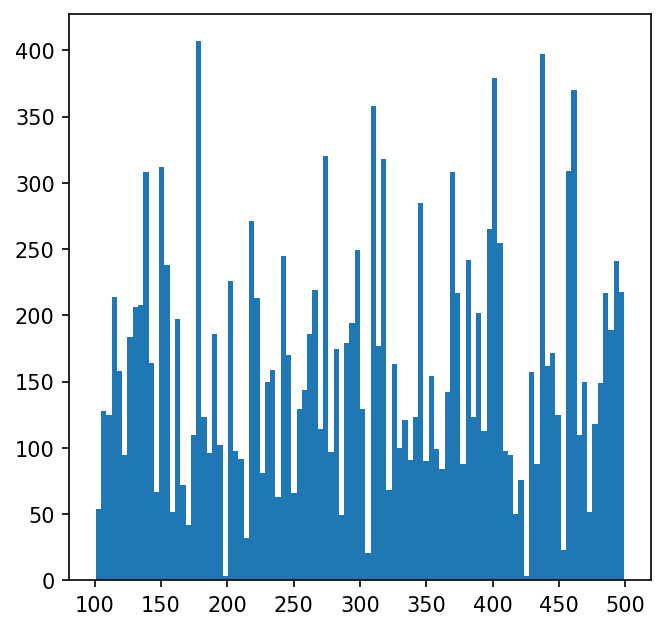

In [40]:
plt.hist(df_jet['parton_pt'], bins=100)

In [ ]:
pdg = {
    '21': 'g',
    '-6': 't', 
    '6': 't',
    '-1': , 
    '-2':, 
    '1': , 
    '-5': , 
    '-4': , 
    '2': ,
    '-3': ,
    '4': , 
    '5': , 
    '3': ,
    
}

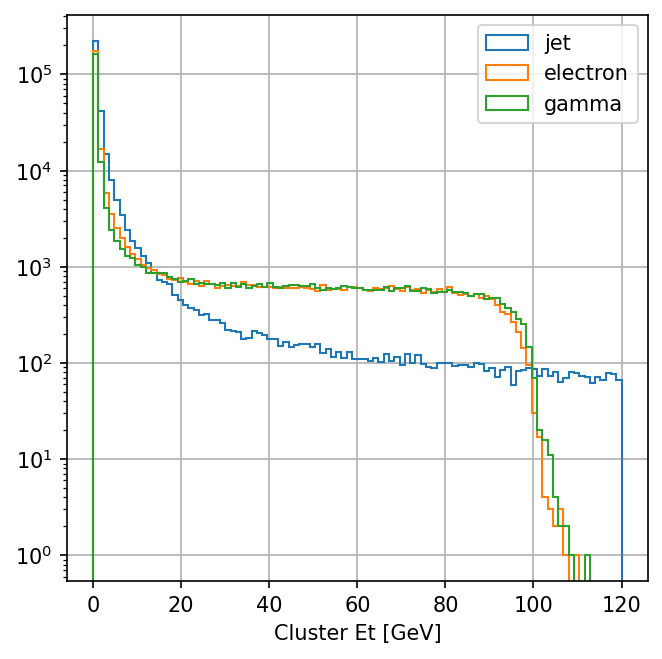

In [9]:
plt.hist(df_jet['et_cluster'], bins=100, range=(0,120), histtype="step", label='jet')
plt.hist(df_ele['et_cluster'], bins=100, range=(0,120), histtype="step", label='electron')
plt.hist(df_gamma['et_cluster'], bins=100, range=(0,120), histtype="step", label='gamma')
plt.yscale("log")
plt.xlabel('Cluster Et [GeV]')
#plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
#plt.show()

#plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/n_clusters.png")

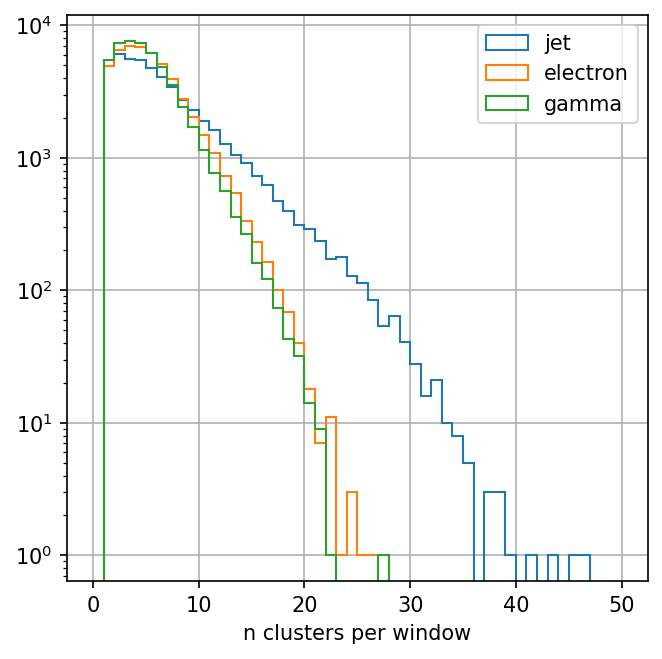

In [23]:
plt.hist(df_jet['n_cl'][df_jet['is_seed'] == 1], bins=50, range=(0,50), histtype="step", label='jet')
plt.hist(df_ele['n_cl'][df_ele['is_seed'] == 1], bins=50, range=(0,50), histtype="step", label='electron')
plt.hist(df_gamma['n_cl'][df_gamma['is_seed'] == 1], bins=50, range=(0,50), histtype="step", label='gamma')
plt.yscale("log")
plt.xlabel('n clusters per window')
#plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
#plt.show()

plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/new_ds_n_clusters.png")

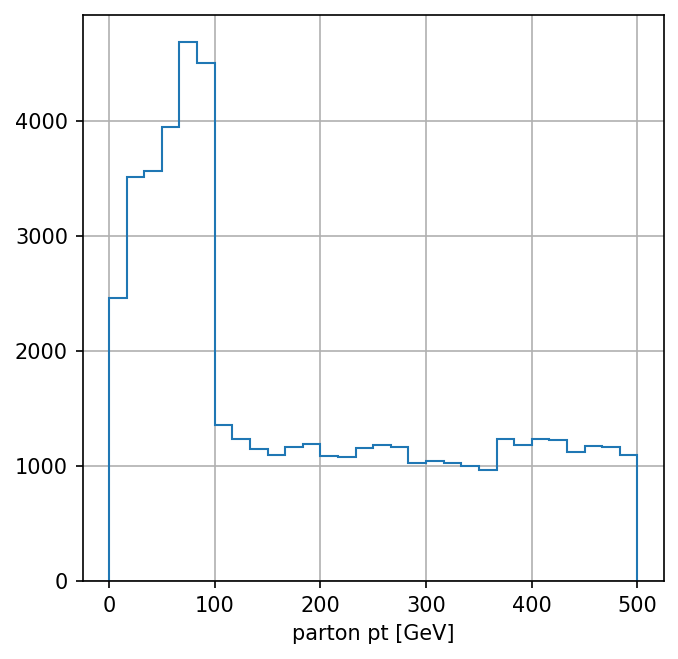

In [33]:
parton_pt = df_jet['parton_pt'][df_jet['is_seed'] == 1.]
plt.hist(parton_pt, bins=30, range=(0,500), histtype="step")
#plt.legend(loc='upper left')
plt.xlabel('parton pt [GeV]')
plt.grid()

plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/new_ds_parton_pt.png")

(array([ 71789.,  33230.,  21832.,  16763.,  52002.,      0.,      0.,
             0.,      0., 129446.]),
 array([-6. , -3.3, -0.6,  2.1,  4.8,  7.5, 10.2, 12.9, 15.6, 18.3, 21. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

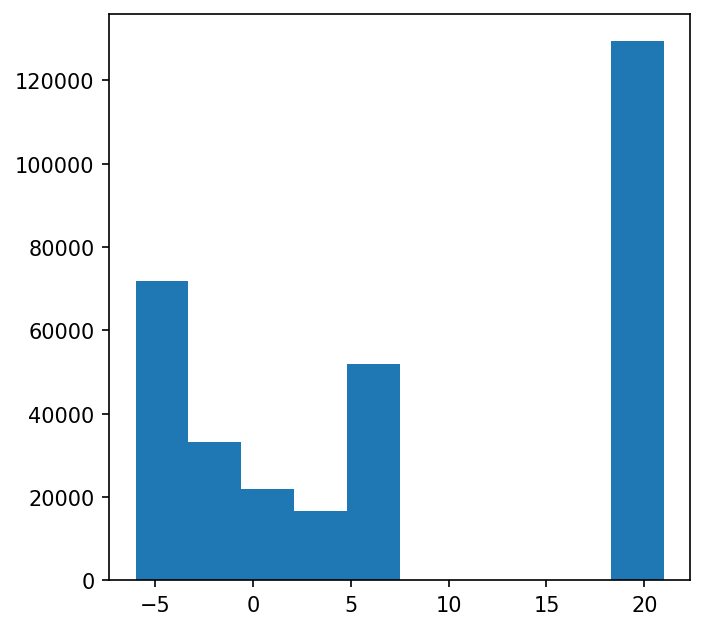

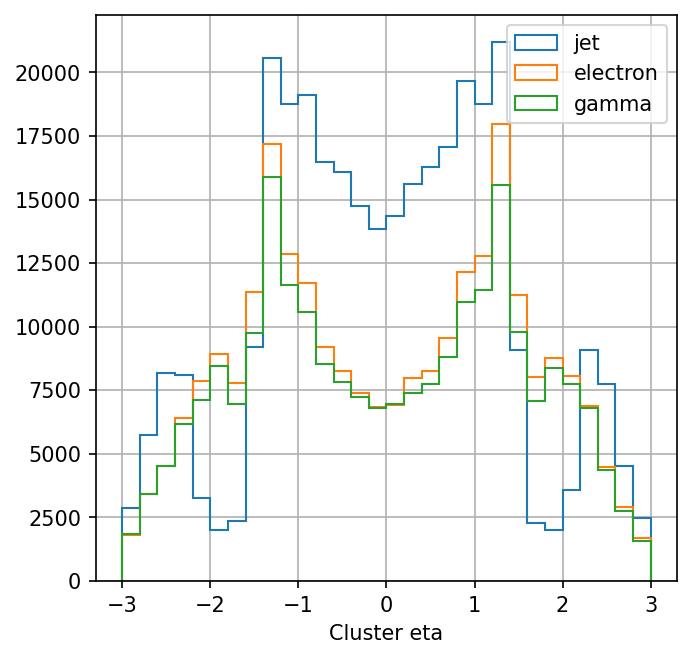

In [20]:
plt.hist(df_jet['cluster_eta'], bins=30, range=(-3,3), histtype="step", label='jet')
plt.hist(df_ele['cluster_eta'], bins=30, range=(-3,3), histtype="step", label='electron')
plt.hist(df_gamma['cluster_eta'], bins=30, range=(-3,3), histtype="step", label='gamma')
#plt.yscale("log")
plt.xlabel('Cluster eta')
#plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/new_ds_eta.png")

In [22]:
df = df_jet
max_cluster = df['en_cluster'].max(level=0).values
seed_energy = df['en_cluster'][df['is_seed']==1].values

In [30]:
a = np.argwhere(max_cluster!=seed_energy)

In [31]:
bad_events = df.loc[a[:,0]]

In [39]:
max_bad_en = bad_events['en_cluster'].max(level=0).values

In [54]:
n = 0
k = 0 
for max_en in max_bad_en: 
    if not np.isin(max_en, seed_energy):
        n+=1
    else: k+=1

In [56]:
100*n/max_bad_en.shape[0], 100*k/max_bad_en.shape[0]

(64.06810035842294, 35.93189964157706)

In [35]:
bad_events[['en_cluster', 'is_seed']].loc[5]

,en_cluster,is_seed
0,13.950067,0
1,3.998220,0
2,3.568219,0
3,2.448203,0
4,1.679127,0
5,1.028858,1
6,0.680732,0
7,0.345687,0
8,0.271542,0


In [13]:
bad_events = df[df['en_cluster'][df['is_seed']==1] != df['en_cluster'].max(level=0)]

ValueError: Can only compare identically-labeled Series objects

Text(0.5, 0, 'Energy most en cluster/ seed energy')

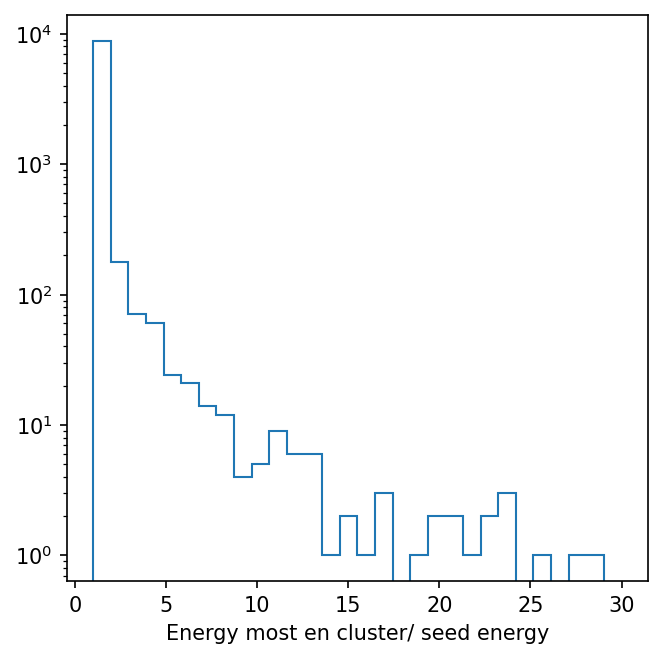

In [140]:
plt.hist(second_to_max/seed_energy, histtype='step', bins=30, range=(1,30))
plt.yscale('log')
plt.xlabel('Energy most en cluster/ seed energy')

In [141]:
np.argwhere(second_to_max/seed_energy > 2)

array([[  11],
       [  50],
       [  65],
       [  81],
       [  97],
       [  99],
       [ 130],
       [ 136],
       [ 146],
       [ 187],
       [ 218],
       [ 238],
       [ 248],
       [ 258],
       [ 286],
       [ 318],
       [ 342],
       [ 346],
       [ 356],
       [ 402],
       [ 422],
       [ 470],
       [ 496],
       [ 514],
       [ 524],
       [ 546],
       [ 588],
       [ 629],
       [ 634],
       [ 711],
       [ 725],
       [ 749],
       [ 750],
       [ 757],
       [ 760],
       [ 767],
       [ 812],
       [ 854],
       [ 883],
       [ 895],
       [ 912],
       [ 941],
       [ 989],
       [1036],
       [1041],
       [1055],
       [1061],
       [1064],
       [1107],
       [1110],
       [1131],
       [1140],
       [1161],
       [1262],
       [1275],
       [1301],
       [1302],
       [1313],
       [1314],
       [1317],
       [1331],
       [1352],
       [1365],
       [1377],
       [1380],
       [1405],
       [14

In [142]:
df['en_cluster'][df['n_cl']>1][df['is_seed']==1][11]

0    25.764381
Name: en_cluster, dtype: float32

In [143]:
df['en_cluster'][df['n_cl']>1].max(level=0).values[11]

27.767492

In [146]:
df_jet[abs(df_jet['en_cluster'] - 27.767492) < 0.00001]

,,en_cluster,et_cluster,cluster_eta,cluster_phi,cluster_ieta,cluster_iphi,cluster_iz,cluster_deta,cluster_dphi,cluster_den_seed,...,sim_true_eta,sim_true_phi,en_mustache_raw,et_mustache_raw,en_mustache_calib,et_mustache_calib,event_tot_simen_PU,wtot_simen_PU,wtot_simen_sig,seed_eta
13,0,27.767492,3.803643,-2.676329,1.673433,49.0,65.0,-1.0,-0.046067,0.332267,-15.381938,...,-2.686846,1.765026,0.000000,0.000000,0.000000,0.000000,3823.312744,8.278641,0.279802,0.016735
16,1,27.767492,3.803643,-2.676329,1.673433,49.0,65.0,-1.0,-0.030850,-0.208117,27.763712,...,-2.765338,1.481215,55.531204,7.377763,86.679611,11.516076,3823.312744,9.058043,11.263085,0.051252


In [151]:
df_jet.loc[13][['en_cluster', 'cluster_eta', 'cluster_phi', 'is_seed']]

,en_cluster,cluster_eta,cluster_phi,is_seed
0,27.767492,-2.676329,1.673433,0
1,12.385554,-2.722396,2.005700,1


In [152]:
df_jet.loc[16][['en_cluster', 'cluster_eta', 'cluster_phi', 'is_seed']]

,en_cluster,cluster_eta,cluster_phi,is_seed
0,55.531204,-2.707180,1.465316,1
1,27.767492,-2.676329,1.673433,0


In [157]:
df_jet.loc[16, 0][['cluster_phi']] - df_jet.loc[13, 1][['cluster_phi']]

cluster_phi   -0.540384
dtype: float64

In [155]:
dynamic_window(df_jet.loc[16, 0]['cluster_eta'])

(0.15, -0.15, 0.4)

In [114]:
df_jet.columns

Index(['en_cluster', 'et_cluster', 'cluster_eta', 'cluster_phi',
       'cluster_ieta', 'cluster_iphi', 'cluster_iz', 'cluster_deta',
       'cluster_dphi', 'cluster_den_seed', 'cluster_det_seed', 'cl_nxtals',
       'is_seed', 'n_cl', 'in_sc', 'parton_matched', 'gen_matched',
       'en_true_sim', 'et_true_sim', 'en_true_gen', 'et_true_gen',
       'en_true_sim_good', 'et_true_sim_good', 'nclusters_insc', 'nVtx', 'rho',
       'obsPU', 'truePU', 'sim_true_eta', 'sim_true_phi', 'en_mustache_raw',
       'et_mustache_raw', 'en_mustache_calib', 'et_mustache_calib',
       'event_tot_simen_PU', 'wtot_simen_PU', 'wtot_simen_sig', 'seed_eta'],
      dtype='object')

In [119]:
def dynamic_window(eta):
    aeta = abs(eta)

    if aeta >= 0 and aeta < 0.1:
        deta_up = 0.075
    if aeta >= 0.1 and aeta < 1.3:
        deta_up = 0.0758929 -0.0178571* aeta + 0.0892857*(aeta**2) 
    elif aeta >= 1.3 and aeta < 1.7:
        deta_up = 0.2
    elif aeta >=1.7 and aeta < 1.9:
        deta_up = 0.625 -0.25*aeta
    elif aeta >= 1.9:
        deta_up = 0.15

    if aeta < 2.1: 
        deta_down = -0.075
    elif aeta >= 2.1 and aeta < 2.5:
        deta_down = -0.1875 *aeta + 0.31875
    elif aeta >=2.5:
        deta_down = -0.15

    if aeta < 1.9:
        dphi = 0.6
    elif aeta >= 1.9 and aeta < 2.7:
        dphi = 1.075 -0.25 * aeta
    elif aeta >= 2.7:
        dphi = 0.4

    return deta_up, deta_down, dphi

In [127]:
dynamic_window(df_jet.loc[159,0]['cluster_eta']) 

(0.07913677783653347, -0.075, 0.6)

In [128]:
dynamic_window(df_jet.loc[159,5]['cluster_eta'])

(0.07674994601657735, -0.075, 0.6)

In [129]:
df_jet.loc[159,5]['cluster_eta'] - df_jet.loc[159,0]['cluster_eta']

0.07525131106376648

In [125]:
df_jet.loc[0][['cluster_ieta', 'cluster_iphi', 'cluster_iz', 'en_cluster', 'parton_matched']]

,cluster_ieta,cluster_iphi,cluster_iz,en_cluster,parton_matched
0,-18.0,134.0,0.0,13.950067,1.0
1,-18.0,144.0,0.0,3.998220,1.0
2,-17.0,130.0,0.0,3.568219,1.0
3,-18.0,120.0,0.0,2.448203,1.0
4,-15.0,135.0,0.0,1.679127,1.0
5,-18.0,123.0,0.0,0.680732,1.0


In [130]:
df_jet.loc[159][['cluster_ieta', 'cluster_iphi', 'cluster_iz', 'en_cluster', 'parton_matched', 'is_seed']]

,cluster_ieta,cluster_iphi,cluster_iz,en_cluster,parton_matched,is_seed
0,-18.0,134.0,0.0,13.950067,1.0,0
1,-18.0,144.0,0.0,3.998220,1.0,0
2,-17.0,130.0,0.0,3.568219,1.0,0
3,-18.0,120.0,0.0,2.448203,1.0,0
4,-15.0,135.0,0.0,1.679127,1.0,0
5,-14.0,132.0,0.0,1.028858,1.0,1
6,-18.0,123.0,0.0,0.680732,1.0,0
7,-10.0,118.0,0.0,0.345687,0.0,0
8,-13.0,103.0,0.0,0.271542,0.0,0


In [67]:
df_jet[abs(df_jet['en_cluster'] - 13.950067) < 0.00001]

,,en_cluster,et_cluster,cluster_eta,cluster_phi,cluster_ieta,cluster_iphi,cluster_iz,cluster_deta,cluster_dphi,cluster_den_seed,...,sim_true_eta,sim_true_phi,en_mustache_raw,et_mustache_raw,en_mustache_calib,et_mustache_calib,event_tot_simen_PU,wtot_simen_PU,wtot_simen_sig,seed_eta
0,0,13.950067,13.284472,-0.315247,2.148866,-18.0,134.0,0.0,0.000000,0.000000,0.000000,...,-0.319929,2.143286,18.629017,17.735523,21.213568,20.196114,3544.225586,0.250976,11.332467,0.011051
159,0,13.950067,13.284472,-0.315247,2.148866,-18.0,134.0,0.0,0.075251,-0.023692,-12.921208,...,-0.256315,2.093580,0.000000,0.000000,0.000000,0.000000,3544.225586,0.523914,0.980474,0.008491


In [103]:
df_jet[abs(df_jet['en_cluster'] - 1.0288581) < 0.00001]

,,en_cluster,et_cluster,cluster_eta,cluster_phi,cluster_ieta,cluster_iphi,cluster_iz,cluster_deta,cluster_dphi,cluster_den_seed,...,sim_true_eta,sim_true_phi,en_mustache_raw,et_mustache_raw,en_mustache_calib,et_mustache_calib,event_tot_simen_PU,wtot_simen_PU,wtot_simen_sig,seed_eta
159,5,1.028858,0.999923,-0.239996,2.125173,-14.0,132.0,0.0,0.0,0.0,0.0,...,-0.256315,2.09358,0.0,0.0,0.0,0.0,3544.225586,0.523914,0.980474,0.008491


In [106]:
df_jet.loc[0][['en_cluster','is_seed', 'cluster_phi', 'cluster_eta']]

,en_cluster,is_seed,cluster_phi,cluster_eta
0,13.950067,1,2.148866,-0.315247
1,3.998220,0,2.336650,-0.314724
2,3.568219,0,2.091101,-0.291687
3,2.448203,0,1.901150,-0.304010
4,1.679127,0,2.161610,-0.257239
5,0.680732,0,1.962278,-0.309743


In [105]:
df_jet.loc[159][['en_cluster','is_seed','cluster_phi', 'cluster_eta']]

,en_cluster,is_seed,cluster_phi,cluster_eta
0,13.950067,0,2.148866,-0.315247
1,3.998220,0,2.336650,-0.314724
2,3.568219,0,2.091101,-0.291687
3,2.448203,0,1.901150,-0.304010
4,1.679127,0,2.161610,-0.257239
5,1.028858,1,2.125173,-0.239996
6,0.680732,0,1.962278,-0.309743
7,0.345687,0,1.872321,-0.170873
8,0.271542,0,1.613507,-0.223218


In [64]:
second_to_max[146], seed_energy[146]

(13.950067, 1.0288581)

In [57]:
df_jet[df_jet['n_cl']>1].loc[146]

,en_cluster,et_cluster,cluster_eta,cluster_phi,cluster_ieta,cluster_iphi,cluster_iz,cluster_deta,cluster_dphi,cluster_den_seed,...,sim_true_eta,sim_true_phi,en_mustache_raw,et_mustache_raw,en_mustache_calib,et_mustache_calib,event_tot_simen_PU,wtot_simen_PU,wtot_simen_sig,seed_eta
0,9.312598,2.188092,-2.127389,-0.320073,75.0,42.0,-1.0,0.000000,0.000000,0.000000,...,-2.430518,0.038333,0.0,0.0,0.0,0.0,4576.27002,9.020548,0.554854,0.013859
1,3.215307,0.690649,-2.219454,-0.253231,73.0,45.0,-1.0,0.092065,-0.066843,6.097291,...,-2.430518,0.038333,0.0,0.0,0.0,0.0,4576.27002,9.020548,0.554854,0.013859
2,1.969373,0.470911,-2.109337,-0.000484,77.0,51.0,-1.0,-0.018052,-0.319589,7.343225,...,-2.430518,0.038333,0.0,0.0,0.0,0.0,4576.27002,9.020548,0.554854,0.013859


In [43]:
ratio = second_to_max / seed_energy

In [46]:
np.argwhere(ratio>10)

array([[ 146],
       [ 218],
       [ 238],
       [1036],
       [1161],
       [1694],
       [1726],
       [2114],
       [2163],
       [2387],
       [2664],
       [2904],
       [3217],
       [3498],
       [3658],
       [3816],
       [4153],
       [4554],
       [4634],
       [5098],
       [5275],
       [5340],
       [5496],
       [5673],
       [5990],
       [6103],
       [6197],
       [6219],
       [6589],
       [6602],
       [6610],
       [6712],
       [6721],
       [6822],
       [6920],
       [6934],
       [6952],
       [7097],
       [7302],
       [7340],
       [7413],
       [7495],
       [7508],
       [7726],
       [7770],
       [7915],
       [8012],
       [8215],
       [8316],
       [8475],
       [8783],
       [9103],
       [9218]])

In [8]:
df_ele['n_cl'][df_ele['is_seed'] == 1]

0     0    4
1     0    4
2     0    4
3     0    3
4     0    7
          ..
9995  0    3
9996  0    4
9997  0    7
9998  0    9
9999  0    5
Name: n_cl, Length: 10000, dtype: int64

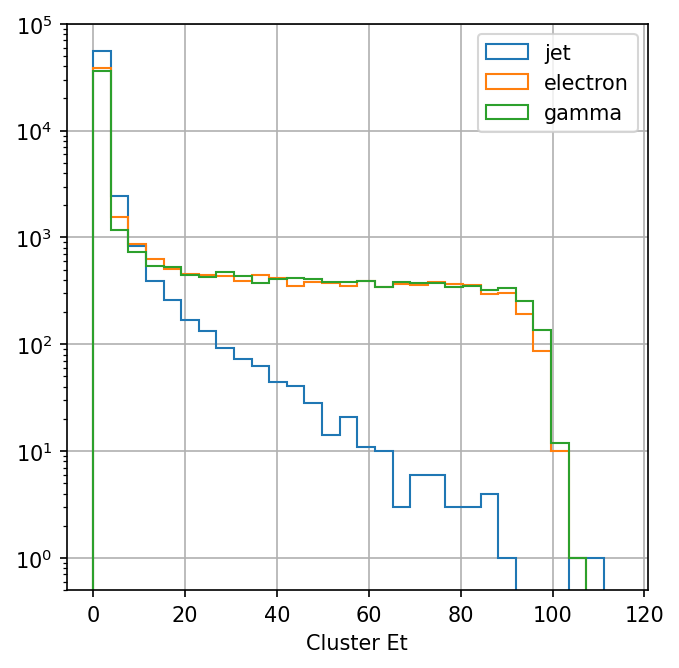

In [33]:
plt.hist(df_jet['et_cluster'], bins=30, range=(0,115), histtype="step", label='jet')
plt.hist(df_ele['et_cluster'], bins=30, range=(0,115), histtype="step", label='electron')
plt.hist(df_gamma['et_cluster'], bins=30, range=(0,115), histtype="step", label='gamma')
plt.yscale("log")
plt.xlabel('Cluster Et')
plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
plt.show()

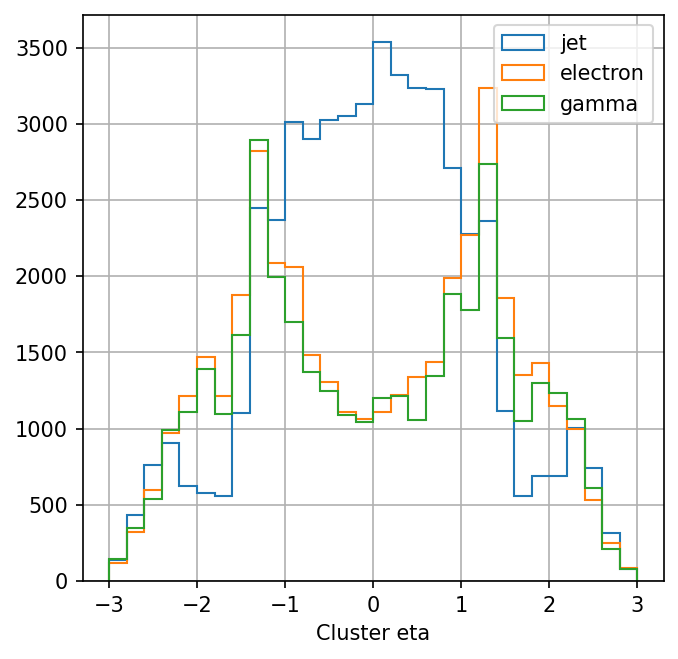

In [23]:
plt.hist(df_jet['cluster_eta'][df_jet['is_seed']!=1], bins=30, range=(-3,3), histtype="step", label='jet')
plt.hist(df_ele['cluster_eta'][df_ele['is_seed']!=1], bins=30, range=(-3,3), histtype="step", label='electron')
plt.hist(df_gamma['cluster_eta'][df_gamma['is_seed']!=1], bins=30, range=(-3,3), histtype="step", label='gamma')
#plt.yscale("log")
plt.xlabel('Cluster eta')
#plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
plt.show()

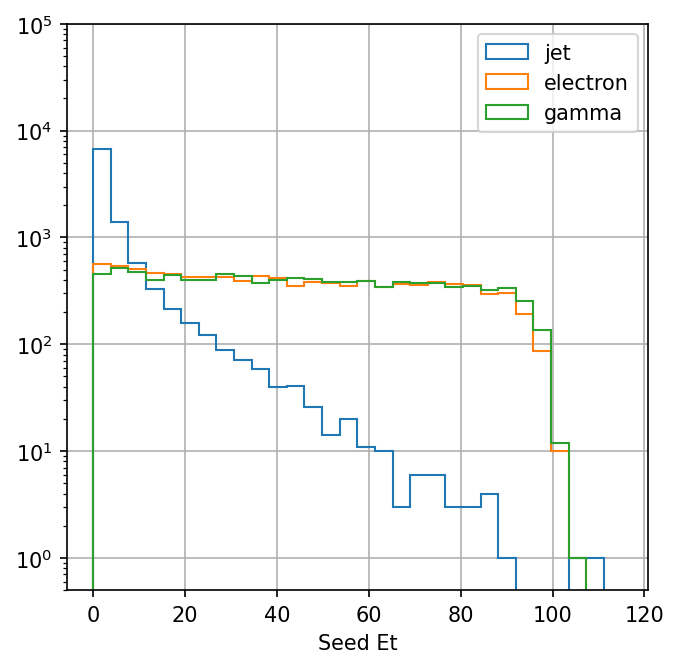

In [32]:
plt.hist(df_jet['et_cluster'][df_jet.is_seed==1], bins=30, range=(0,115), histtype="step", label='jet')
plt.hist(df_ele['et_cluster'][df_ele.is_seed==1], bins=30, range=(0,115), histtype="step", label='electron')
plt.hist(df_gamma['et_cluster'][df_gamma.is_seed==1], bins=30, range=(0,115), histtype="step", label='gamma')
plt.yscale("log")
plt.xlabel('Seed Et')
plt.ylim(0.5, 10**5)
plt.grid()
plt.legend()
plt.show()

In [15]:
# number of clusters range
ncl_range = [np.arange(1,10), np.arange(10,20), np.arange(20,30)]
ncl_title = ['1-9', '10-19', '20-29']

In [16]:
def draw_seed(variable):
    fig, axis = plt.subplots(1, 2, figsize=(8,4))
    
    n_cl = df[variable][df['is_seed'] == 1.]

    ax = axis[0]
    ax.hist(n_cl, bins=30, histtype="step")
    ax.set_yscale("log")
    ax.set_xlabel(variable + ' of the seed')
    
    ax = axis[1]
    for j, n in enumerate(ncl_range):
        ax.hist(df[variable][df['is_seed'] == 1.][df['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
        ax.set_yscale("log")
        ax.legend(title="N of clusters")
    ax.set_xlabel(variable + ' of the seed')

# Number of clusters per window

Text(0.5, 0, 'number of clusters')

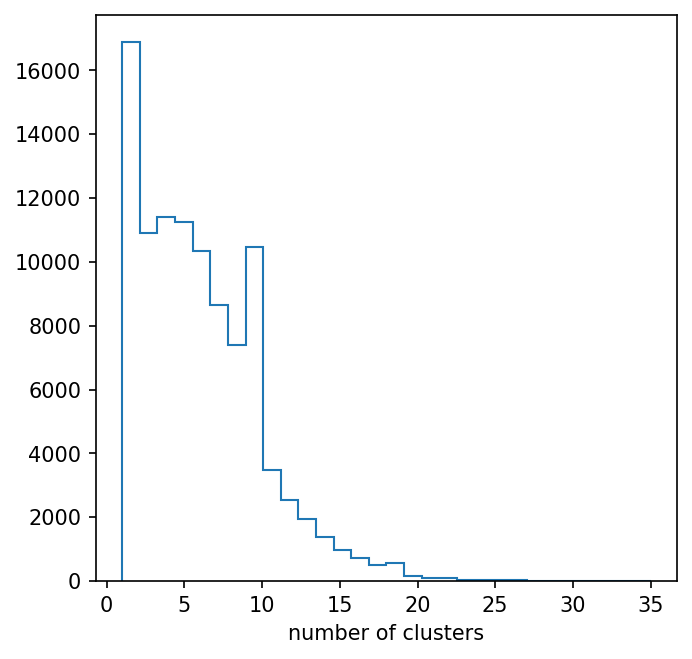

In [17]:
n_cl = df['n_cl'][df['is_seed'] == 1.]
plt.hist(n_cl, bins=30, histtype="step")
plt.xlabel('number of clusters')

# Energy distribution of the seed

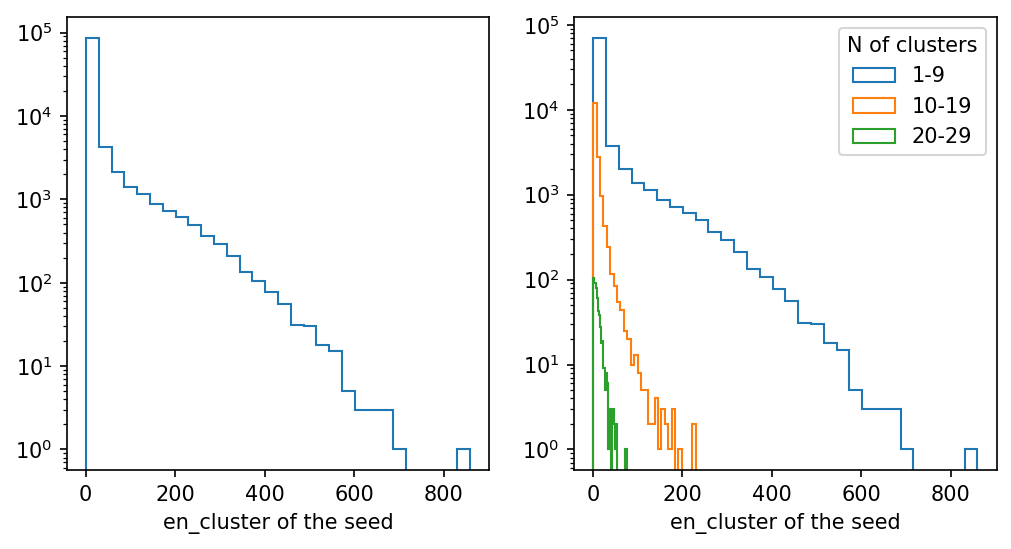

In [18]:
draw_seed('en_cluster')

# Et of the seed

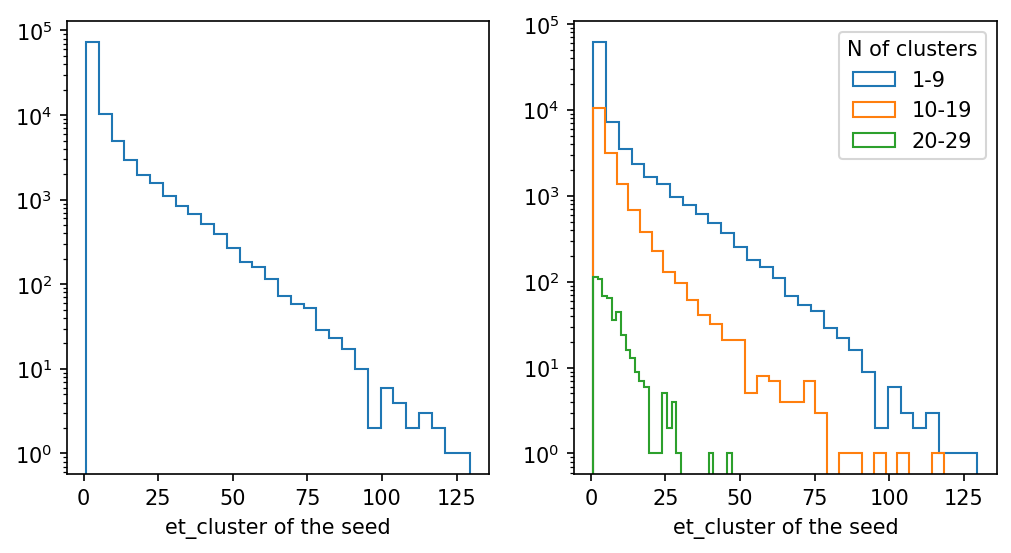

In [19]:
draw_seed('et_cluster')

# iphi of the seed

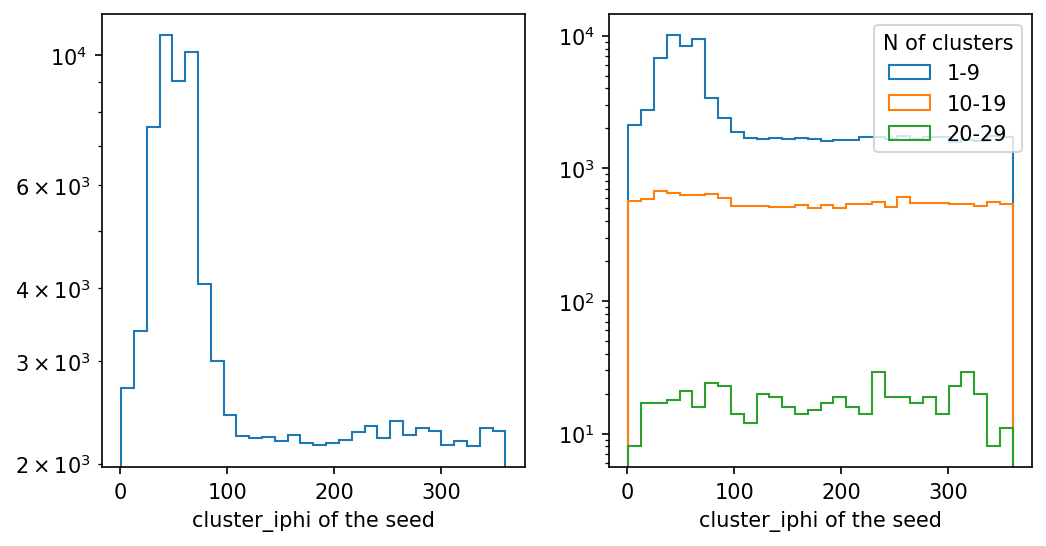

In [20]:
draw_seed('cluster_iphi')

# eta of the seed

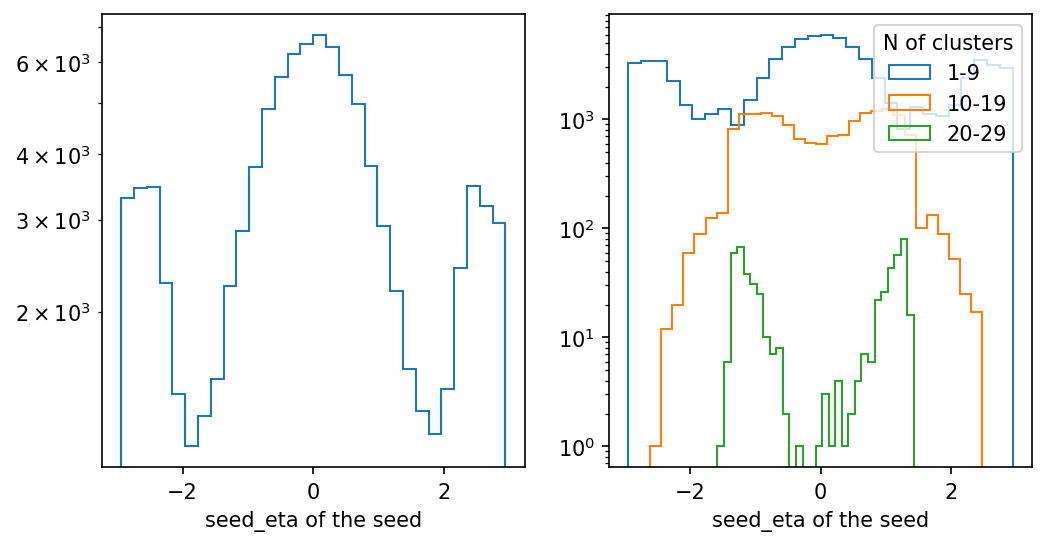

In [21]:
draw_seed('seed_eta')

# Energy distribution of clusters

Text(0.5, 0, 'E')

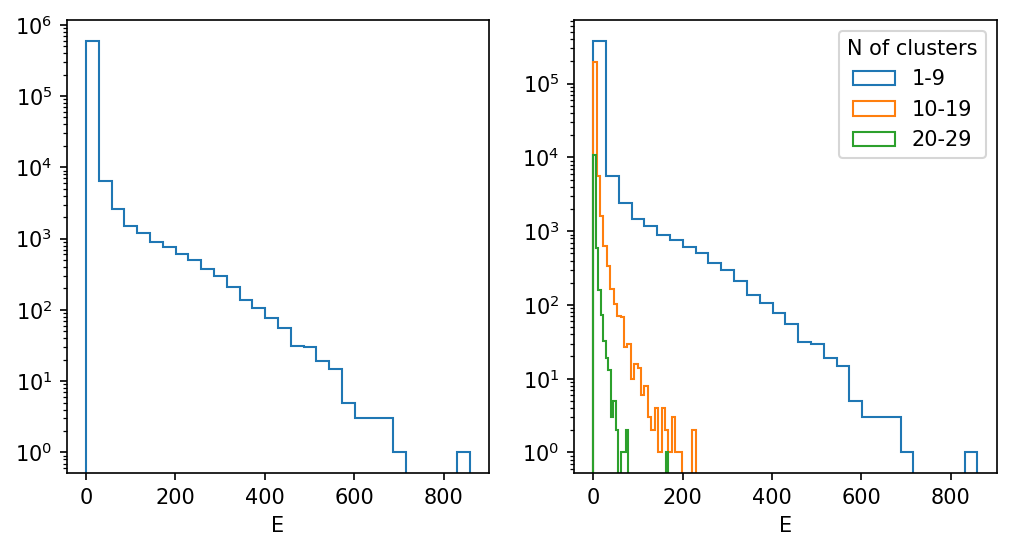

In [22]:
fig, axis = plt.subplots(1, 2, figsize=(8,4))

ax = axis[0]

ax.hist(df['en_cluster'], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('E')

ax = axis[1]
for j, n in enumerate(ncl_range):
    ax.hist(df['en_cluster'][df['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
ax.set_yscale("log")
ax.legend(title="N of clusters")

ax.set_xlabel('E')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')

In [24]:
from data_tools import convert_df

In [36]:
data_ele = {"ele_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v11/training/calo_matched/*.proto"}
data_gamma = {"gamma_match": "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v11/training/calo_matched/*.proto"}

In [37]:
features = {"cl_features": [ "en_cluster", "et_cluster", "cluster_ieta", "cluster_iphi", "cluster_iz"], 
            "window_metadata":["sim_true_eta", "truePU", "rho", "wtot_simen_PU"],
           "seed_features": ["seed_eta"], "window_features":["max_en_cluster", "max_et_cluster"]}

In [48]:
n = 100000
df_ele = convert_df(data_ele, features, n)
df_gamma = convert_df(data_gamma, features, n)

(<tf.Tensor: shape=(1, 4, 5), dtype=float32, numpy=
array([[[20.618114  ,  5.4661016 , 54.        , 80.        ,
          1.        ],
        [ 4.2331085 ,  1.1084521 , 52.        , 80.        ,
          1.        ],
        [ 3.2150362 ,  0.84778905, 58.        , 79.        ,
          1.        ],
        [ 1.2323152 ,  0.32296938, 38.        , 77.        ,
          1.        ]]], dtype=float32)>, <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[20.618114 ,  5.4661016]], dtype=float32)>, <tf.RaggedTensor [[[[53.0, 80.0, 1.0, 14.186890602111816], [53.0, 79.0, 1.0, 1.061455249786377], [54.0, 79.0, 1.0, 1.0563790798187256], [54.0, 80.0, 1.0, 2.39237642288208], [54.0, 81.0, 1.0, 1.1592108011245728], [55.0, 82.0, 1.0, 0.5044560432434082], [52.0, 79.0, 1.0, 0.06816329061985016], [52.0, 80.0, 1.0, 0.1891838014125824]], [[53.0, 79.0, 1.0, 0.016018318012356758], [54.0, 79.0, 1.0, 1.6945024981396273e-05], [54.0, 80.0, 1.0, 2.0859504729742184e-05], [54.0, 81.0, 1.0, 3.132535312033724e

ValueError: not enough values to unpack (expected 4, got 1)

# Et distribution of clusters

Text(0.5, 0, 'Et')

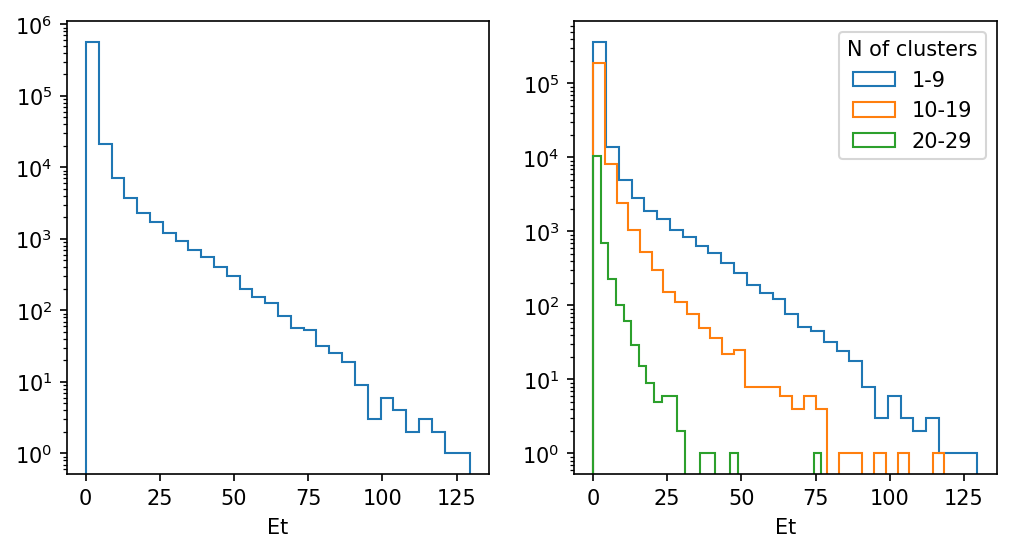

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(8,4))

ax = axis[0]

ax.hist(df['et_cluster'], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('Et')

ax = axis[1]
for j, n in enumerate(ncl_range):
    ax.hist(df['et_cluster'][df['n_cl'].isin(n)], label=ncl_title[j], bins=30, histtype="step")
ax.set_yscale("log")
ax.legend(title="N of clusters")

ax.set_xlabel('Et')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')

In [15]:
df['parton_pdg'].value_counts()

-6.0     214158
 6.0     206801
 21.0     90919
-2.0      12716
 1.0      12433
-4.0      12341
 2.0      10716
-5.0      10497
 4.0       9392
-1.0       8821
 5.0       8524
-3.0       8212
 3.0       7417
Name: parton_pdg, dtype: int64

# Gen information

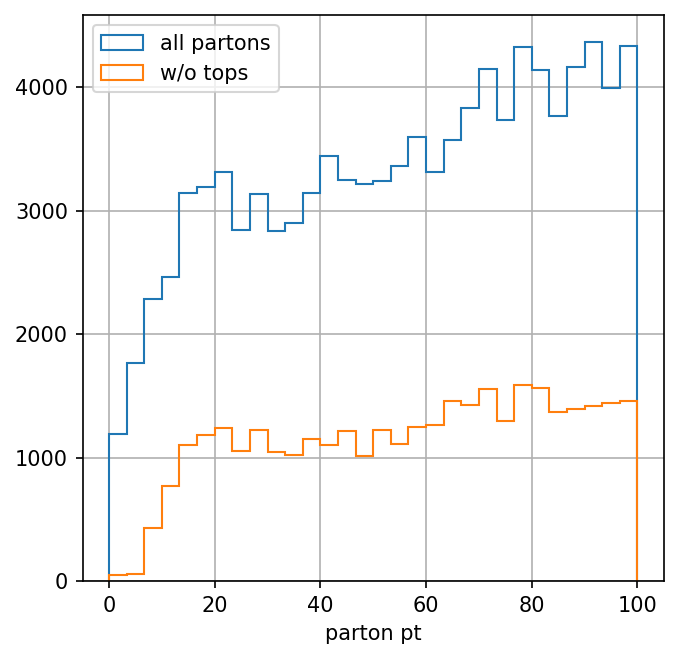

In [23]:
parton_pt_top = df['parton_pt'][df['is_seed'] == 1.]
parton_pt = df['parton_pt'][df['is_seed'] == 1.][(df['parton_pdg']!=6) & (df['parton_pdg']!=-6)]
plt.hist(parton_pt_top, bins=30, range=(0,100), histtype="step", label='all partons')
plt.hist(parton_pt, bins=30, range=(0,100), histtype="step", label='w/o tops')
plt.legend(loc='upper left')
plt.xlabel('parton pt')
plt.grid()

#plt.savefig("/eos/user/p/psimkina/www/SuperClustering/jets/validation_plots/parton_pt_with_tops.png")

Text(0.5, 0, 'Et')

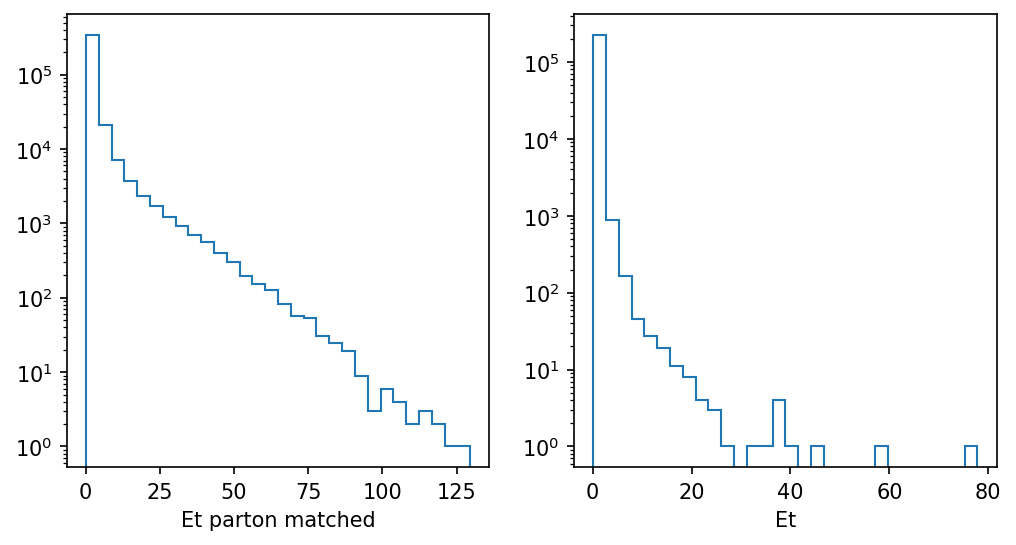

In [46]:
fig, axis = plt.subplots(1, 2, figsize=(8,4))

ax = axis[0]

ax.hist(df['et_cluster'][df['parton_matched'] == 1], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('Et parton matched')

ax = axis[1]
ax.hist(df['et_cluster'][df['parton_matched'] != 1], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('Et not parton matched')

ax.set_xlabel('Et')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')

Text(0.5, 0, 'Et')

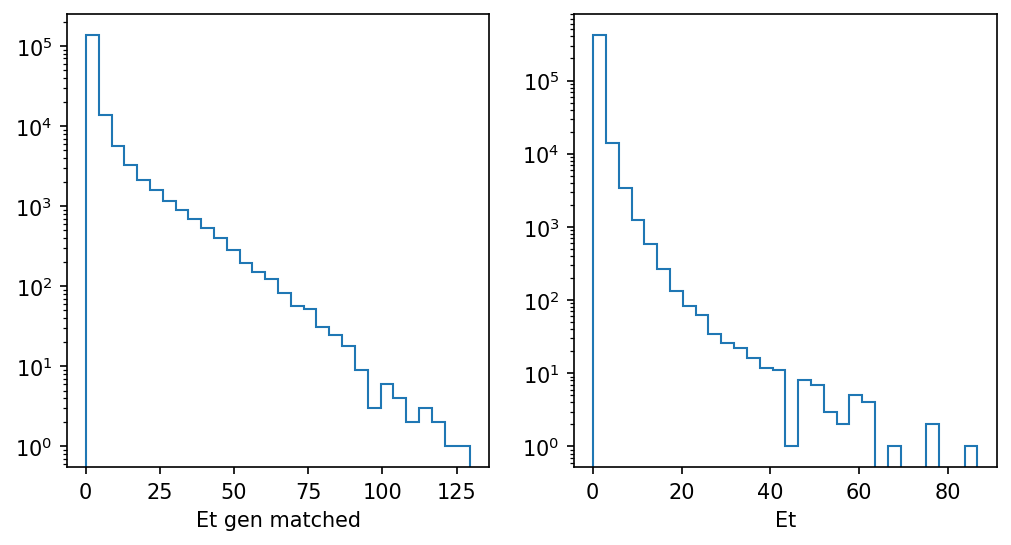

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(8,4))

ax = axis[0]

ax.hist(df['et_cluster'][df['gen_matched'] == 1], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('Et gen matched')

ax = axis[1]
ax.hist(df['et_cluster'][df['gen_matched'] != 1], bins=30, histtype="step")
ax.set_yscale("log")
ax.set_xlabel('Et not gen matched')

ax.set_xlabel('Et')
#fig.text(0.08, 0.25, '# of clusters', va='center', rotation='vertical')

# N clusters vs. N clusters in SC

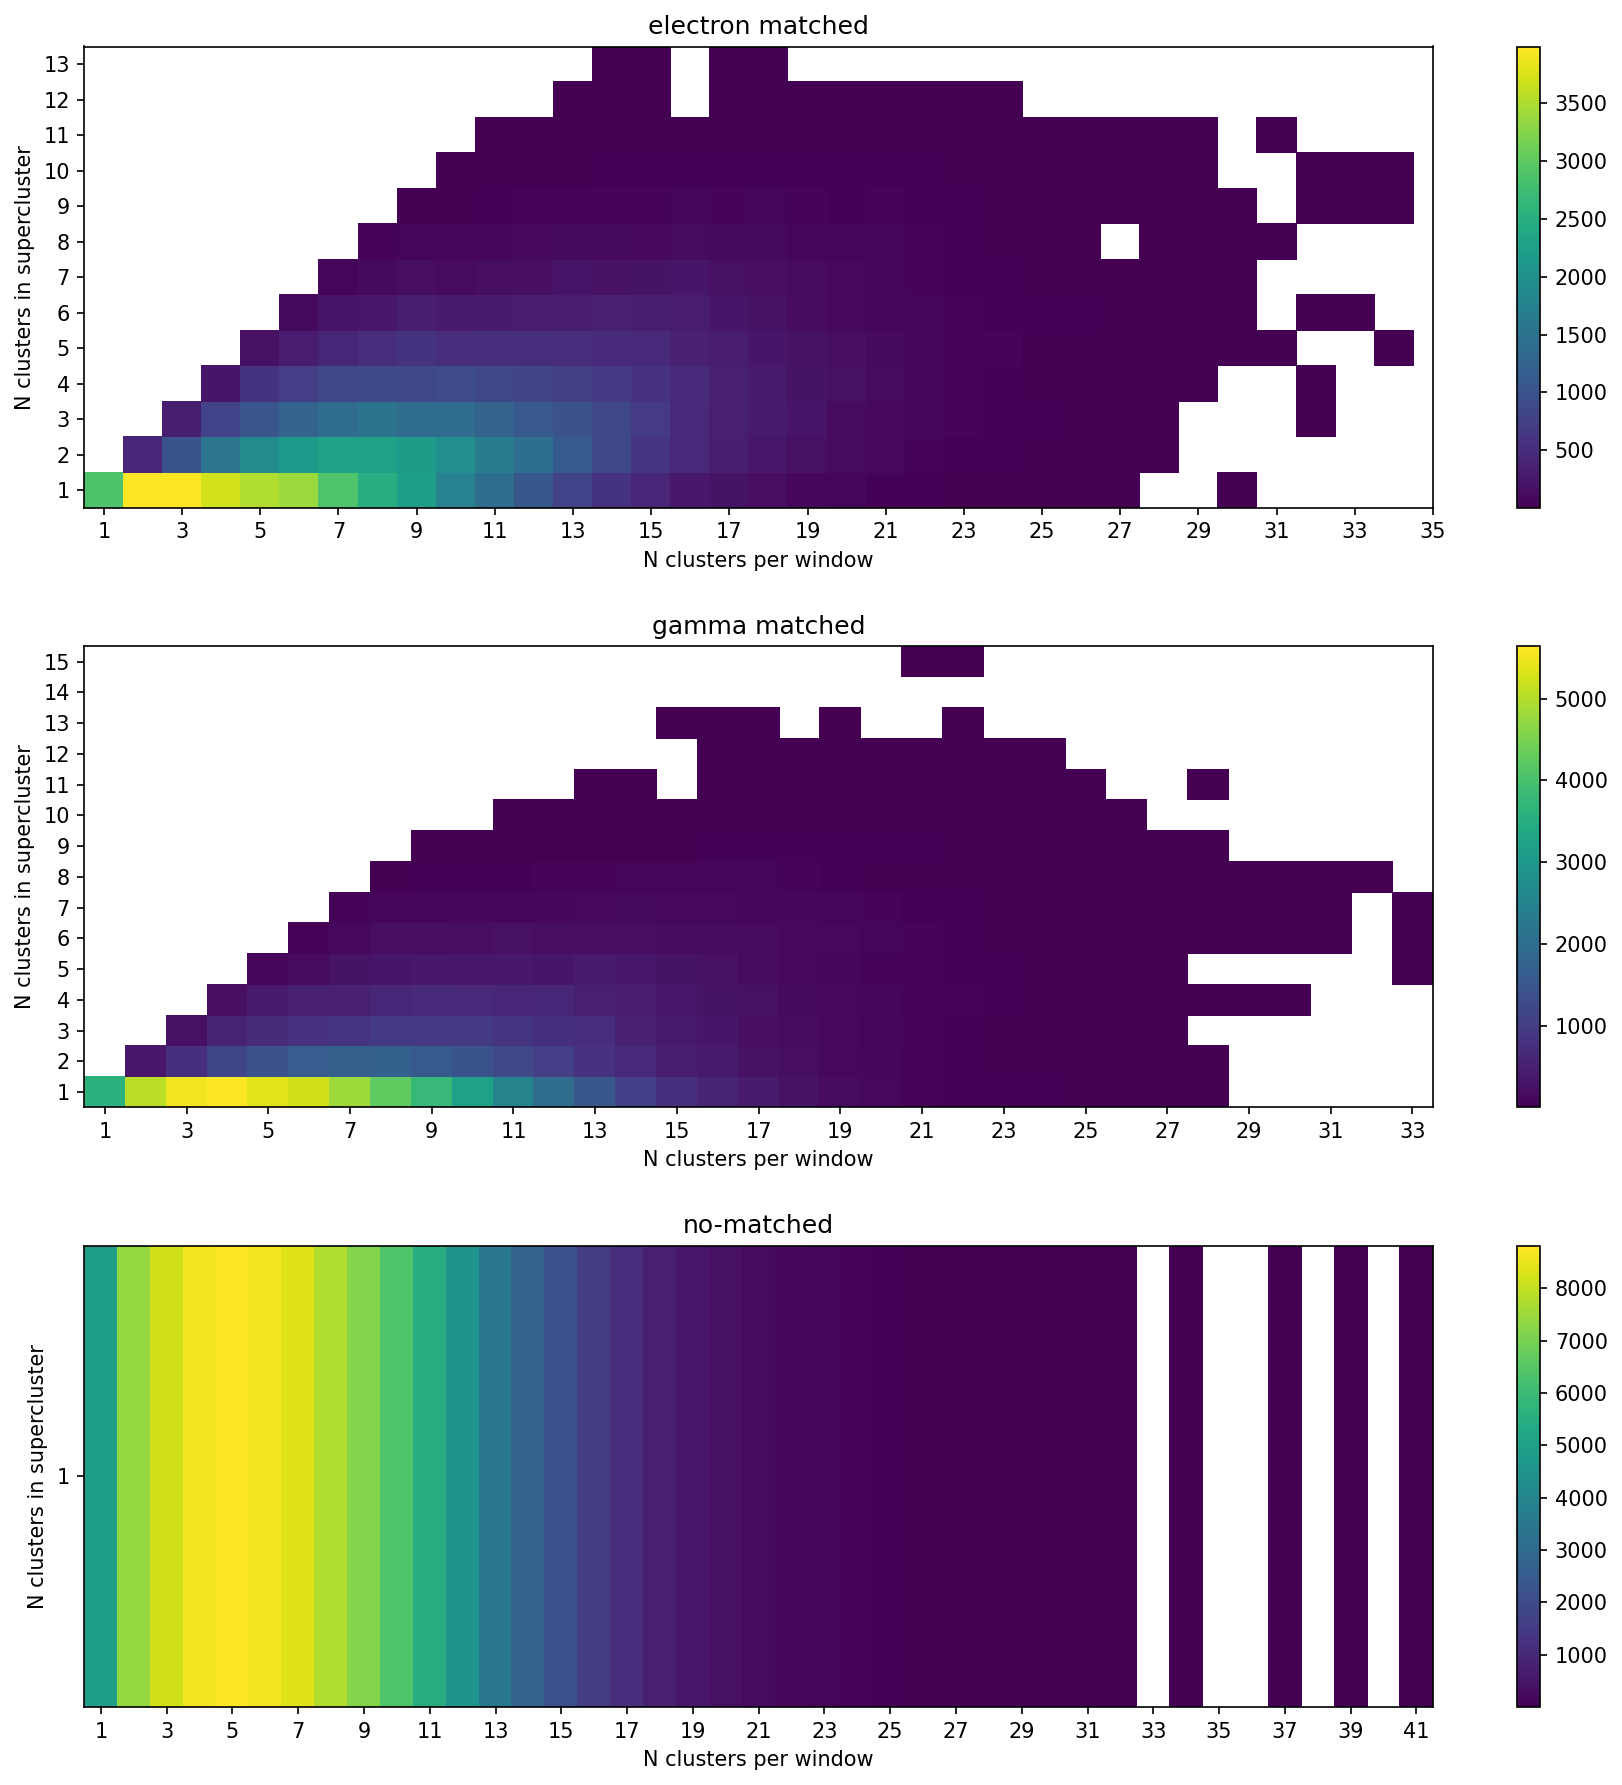

In [18]:
fig, axis = plt.subplots(3, figsize=(12,12))

for i, d in enumerate(df):
    ax = axis[i]
    
    n_cl = d['n_cl'][d['is_seed'] == 1.]
    in_sc = d['in_sc'].sum(level=0)
    
    C, xedges, yedges = np.histogram2d(n_cl, in_sc, bins=[max(n_cl), max(in_sc)], range=[[min(n_cl)-0.5, max(n_cl)+0.5],[min(in_sc)-0.5, max(in_sc)+0.5]])
    X, Y = np.meshgrid(xedges, yedges)
    C[C==0.] = np.nan 
    
    p = ax.pcolormesh(X, Y, C.T, cmap = 'viridis')
    plt.colorbar(p, ax=ax)
    ax.set_xlabel('N clusters per window')
    ax.set_ylabel('N clusters in supercluster')
    ax.set_xticks(np.arange(min(n_cl), max(n_cl)+2,2))
    ax.set_yticks(np.arange(min(in_sc), max(in_sc)+1,1))
    ax.set_title(df_title[i])
    
fig.tight_layout()
fig.subplots_adjust(hspace=0.3)

In [36]:
energy_range = [[0,20], [20,40], [40,60], [60,80], [80,100]]
energy_title = ['0 - 20', '20 - 40', '40 - 60', '60 - 80', '80 - 100']

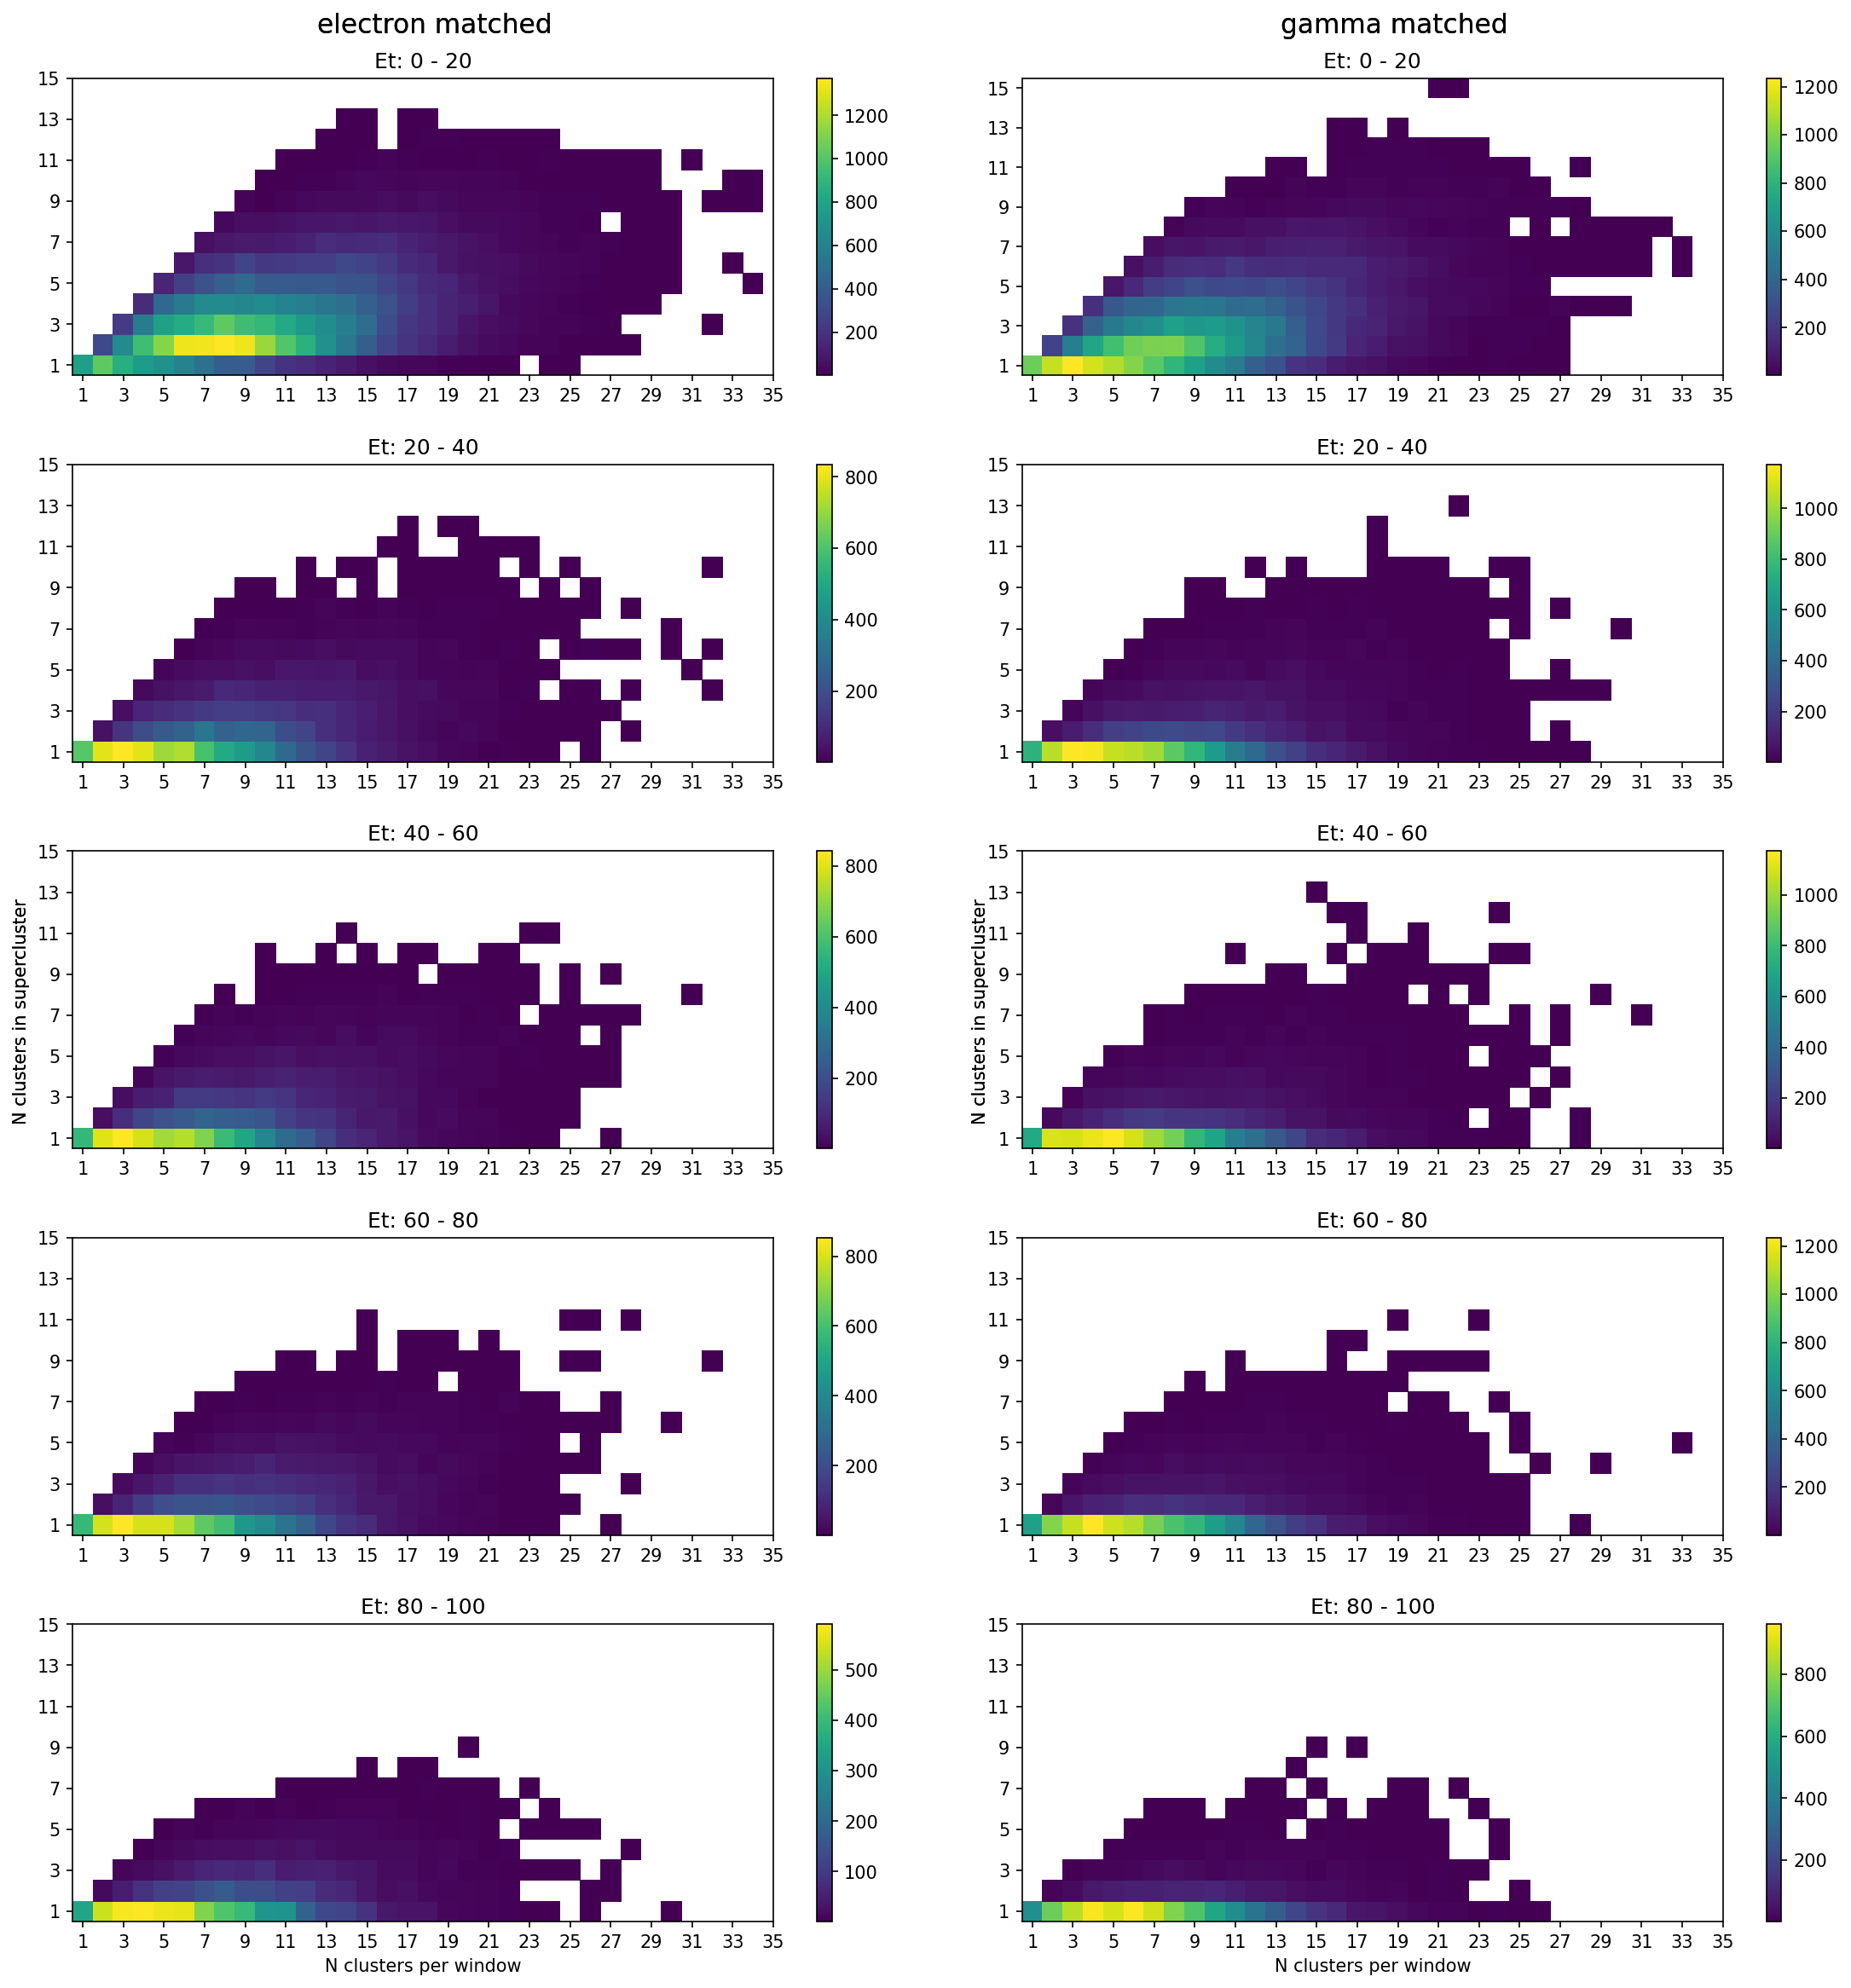

In [37]:
fig, axis = plt.subplots(5, 2, figsize=(15,15))
fig.tight_layout()

for i, d in enumerate(df[:-1]):
    
    seed = d[['n_cl', 'et_cluster']][d['is_seed'] == 1.]
    seed['in_sc'] = d['in_sc'].sum(level=0).values
    
    ax = axis[0,i]
    
    for j, en in enumerate(energy_range): 
        ax = axis[j,i]
        n_cl = seed['n_cl'][(seed['et_cluster']>=en[0])&(seed['et_cluster']<en[1])]
        in_sc = seed['in_sc'][(seed['et_cluster']>=en[0])&(seed['et_cluster']<en[1])]
   
        C, xedges, yedges = np.histogram2d(n_cl, in_sc, bins=[max(n_cl), max(in_sc)], range=[[min(n_cl)-0.5, max(n_cl)+0.5],[min(in_sc)-0.5, max(in_sc)+0.5]])
        X, Y = np.meshgrid(xedges, yedges)
        C[C==0.] = np.nan 
    
        p = ax.pcolormesh(X, Y, C.T, cmap = 'viridis')
        plt.colorbar(p, ax=ax)
        
        ax.set_xticks(np.arange(min(n_cl), 34+2,2))
        ax.set_yticks(np.arange(min(in_sc), 15+2,2))
        
        ax.set_title('Et: ' + energy_title[j])

    ax.set_xlabel('N clusters per window')
    fig.text(0.0, 0.5, 'N clusters in supercluster', va='center', rotation='vertical')
    fig.text(0.5, 0.5, 'N clusters in supercluster', va='center', rotation='vertical')
    fig.text(0.22, 1.01, df_title[0], ha='center', fontsize=15.)
    fig.text(0.72, 1.01, df_title[1], ha='center', fontsize=15.)
    fig.subplots_adjust(hspace=0.3)

In [41]:
energy_range = [[0,1], [1,3], [3,5], [5,7], [7,10], [10,13], [13,16], [16,20]]
energy_title = ['0 - 1', '1 - 3', '3 - 5', '5 - 7', '7 - 10', '10-13', '13-16', '16-20']

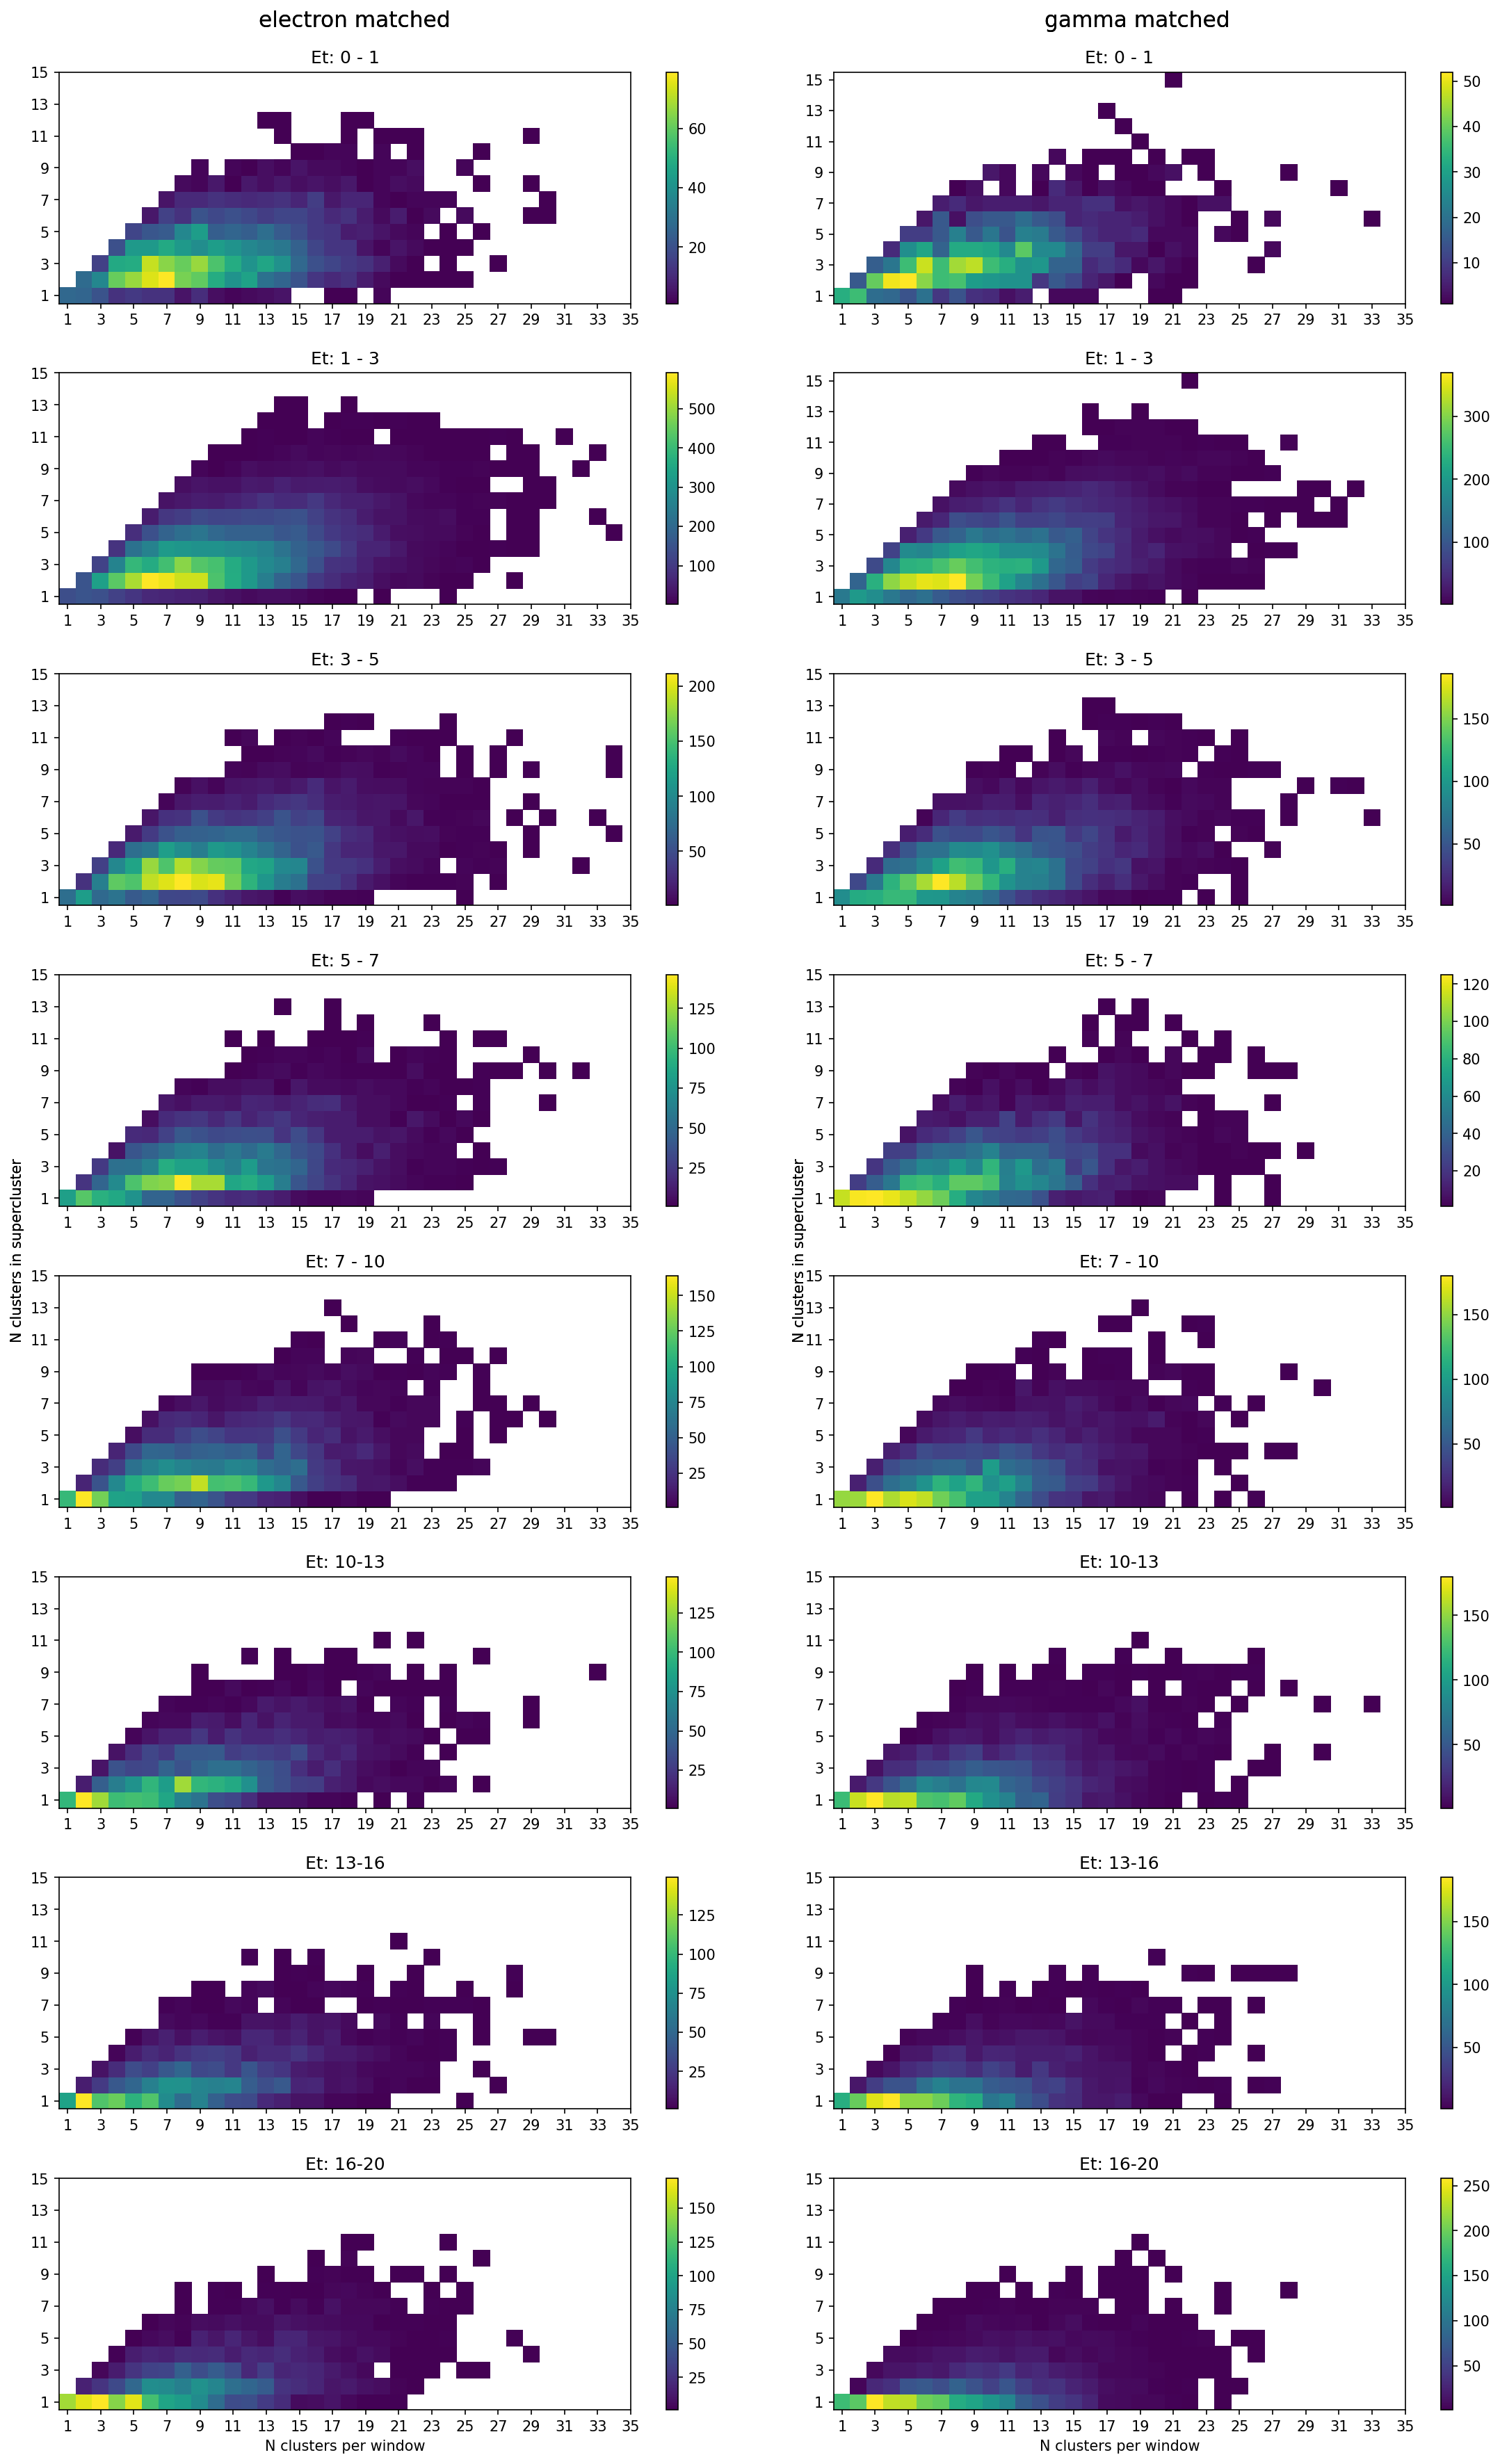

In [42]:
fig, axis = plt.subplots(len(energy_range), 2, figsize=(15,23))
fig.tight_layout()

for i, d in enumerate(df[:-1]):
    
    seed = d[['n_cl', 'et_cluster']][d['is_seed'] == 1.]
    seed['in_sc'] = d['in_sc'].sum(level=0).values
    
    ax = axis[0,i]
    
    for j, en in enumerate(energy_range): 
        ax = axis[j,i]
        n_cl = seed['n_cl'][(seed['et_cluster']>=en[0])&(seed['et_cluster']<en[1])]
        in_sc = seed['in_sc'][(seed['et_cluster']>=en[0])&(seed['et_cluster']<en[1])]
   
        C, xedges, yedges = np.histogram2d(n_cl, in_sc, bins=[max(n_cl), max(in_sc)], range=[[min(n_cl)-0.5, max(n_cl)+0.5],[min(in_sc)-0.5, max(in_sc)+0.5]])
        X, Y = np.meshgrid(xedges, yedges)
        C[C==0.] = np.nan 
    
        p = ax.pcolormesh(X, Y, C.T, cmap = 'viridis')
        plt.colorbar(p, ax=ax)
        
        ax.set_xticks(np.arange(min(n_cl), 34+2,2))
        ax.set_yticks(np.arange(min(in_sc), 15+2, 2))
        
        ax.set_title('Et: ' + energy_title[j])

    ax.set_xlabel('N clusters per window')
    fig.text(0.0, 0.5, 'N clusters in supercluster', va='center', rotation='vertical')
    fig.text(0.5, 0.5, 'N clusters in supercluster', va='center', rotation='vertical')
    fig.text(0.22, 1.01, df_title[0], ha='center', fontsize=15.)
    fig.text(0.72, 1.01, df_title[1], ha='center', fontsize=15.)
    fig.subplots_adjust(hspace=0.3)